# Ayudantia 6

In [129]:
import pandas as pd

import matplotlib.pyplot as plt

dataframe_bikes = pd.read_csv('trips/austin_bikeshare_trips.csv')

### 1) Revisión de datos 

1.a) Mostrar los primeros 10 elementos del conjunto de datos.

In [101]:
dataframe_bikes.head(10)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0
5,861.0,15:12:00,29,2537.0,West & 6th St.,5.0,2540.0,17th & Guadalupe,2015-05-29 15:12:00,Local30,9900153369,2015.0
6,382.0,12:24:16,17,2575.0,Riverside @ S. Lamar,7.0,2567.0,Palmer Auditorium,2016-07-26 12:24:16,Walk Up,11114967,2016.0
7,435.0,13:12:00,49,2575.0,Riverside @ S. Lamar,1.0,2575.0,Riverside @ S. Lamar,2015-01-15 13:12:00,Walk Up,9900005413,2015.0
8,555.0,13:12:00,19,2571.0,Red River & 8th Street,5.0,2503.0,South Congress & James,2014-05-05 13:12:00,24-Hour Kiosk (Austin B-cycle),9900126917,2014.0
9,668.0,12:27:28,20,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,NaN,2575.0,Riverside @ S. Lamar,2017-07-08 12:27:28,Walk Up,15339050,NaN


 1.b) Verifica los tipos de datos contenidos en nuestro DataFrame para entender su estructura y facilitar su análisis.

Si queremos analizar que tipo de dato tiene nuestro dataframe, las dos formas siguientes son validas

In [102]:
dataframe_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649231 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bikeid              648508 non-null  float64
 1   checkout_time       649231 non-null  object 
 2   duration_minutes    649231 non-null  int64  
 3   end_station_id      629389 non-null  float64
 4   end_station_name    649231 non-null  object 
 5   month               618479 non-null  float64
 6   start_station_id    630190 non-null  float64
 7   start_station_name  649231 non-null  object 
 8   start_time          649231 non-null  object 
 9   subscriber_type     647154 non-null  object 
 10  trip_id             649231 non-null  int64  
 11  year                618479 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 59.4+ MB


In [103]:
print(dataframe_bikes.dtypes)

bikeid                float64
checkout_time          object
duration_minutes        int64
end_station_id        float64
end_station_name       object
month                 float64
start_station_id      float64
start_station_name     object
start_time             object
subscriber_type        object
trip_id                 int64
year                  float64
dtype: object


1.c) ¿Son coherentes los tipos de datos detectados por pandas?

Notemos que los id se encuentran en formato float, para mayor comodidad podemos transformar estos datos a int 

Si tenemos valores NaN podemos rellenar estos con 0 de la siguiente manera 

In [104]:
columns_to_convert = ['bikeid', 'end_station_id', 'month', 'start_station_id', 'year']
dataframe_bikes[columns_to_convert] = dataframe_bikes[columns_to_convert].fillna(0)  


In [105]:


for col in columns_to_convert:
    dataframe_bikes[col] = dataframe_bikes[col].astype(int)

Verificamos nuevamente los tipos de datos  de nuestras columnas 

In [106]:
print(dataframe_bikes.dtypes)

bikeid                 int64
checkout_time         object
duration_minutes       int64
end_station_id         int64
end_station_name      object
month                  int64
start_station_id       int64
start_station_name    object
start_time            object
subscriber_type       object
trip_id                int64
year                   int64
dtype: object


### Eliminar columnas

En este caso podriamos considerar que todas las columnas contienen informacion importante, pero en caso de querer eliminar una podemos realizar lo siguiente 

In [107]:
dataframe_bikes.drop(columns=['start_time'], inplace=True)
dataframe_bikes.head(15)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,subscriber_type,trip_id,year
0,8,19:12:00,41,2565,Trinity & 6th Street,3,2536,Waller & 6th St.,Walk Up,9900082882,2015
1,141,2:06:04,6,2570,South Congress & Academy,10,2494,2nd & Congress,Local365,12617682,2016
2,578,16:28:27,13,2498,Convention Center / 4th St. @ MetroRail,3,2538,Bullock Museum @ Congress & MLK,Local365,9075366,2016
3,555,15:12:00,80,2712,Toomey Rd @ South Lamar,11,2497,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014
4,86,15:39:13,25,3377,MoPac Pedestrian Bridge @ Veterans Drive,4,2707,Rainey St @ Cummings,Walk Up,14468597,2017
5,861,15:12:00,29,2537,West & 6th St.,5,2540,17th & Guadalupe,Local30,9900153369,2015
6,382,12:24:16,17,2575,Riverside @ S. Lamar,7,2567,Palmer Auditorium,Walk Up,11114967,2016
7,435,13:12:00,49,2575,Riverside @ S. Lamar,1,2575,Riverside @ S. Lamar,Walk Up,9900005413,2015
8,555,13:12:00,19,2571,Red River & 8th Street,5,2503,South Congress & James,24-Hour Kiosk (Austin B-cycle),9900126917,2014
9,668,12:27:28,20,3377,MoPac Pedestrian Bridge @ Veterans Drive,0,2575,Riverside @ S. Lamar,Walk Up,15339050,0


1.d) Buscar si existen filas duplicadas en el conjunto de datos y, en caso de, elimina la fila duplicada.

In [108]:
obtener_duplicados = dataframe_bikes.duplicated(keep=False)
datos_duplicados = dataframe_bikes[obtener_duplicados]
datos_duplicados

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,subscriber_type,trip_id,year


En este caso no tenemos duplicados, pero en caso de una forma de eliminar estos duplicados es de la siguiente manera 

In [109]:
dataframe_bike_sin_duplicados = dataframe_bikes.drop_duplicates(keep='last') ## 
dataframe_bike_sin_duplicados 

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,subscriber_type,trip_id,year
0,8,19:12:00,41,2565,Trinity & 6th Street,3,2536,Waller & 6th St.,Walk Up,9900082882,2015
1,141,2:06:04,6,2570,South Congress & Academy,10,2494,2nd & Congress,Local365,12617682,2016
2,578,16:28:27,13,2498,Convention Center / 4th St. @ MetroRail,3,2538,Bullock Museum @ Congress & MLK,Local365,9075366,2016
3,555,15:12:00,80,2712,Toomey Rd @ South Lamar,11,2497,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014
4,86,15:39:13,25,3377,MoPac Pedestrian Bridge @ Veterans Drive,4,2707,Rainey St @ Cummings,Walk Up,14468597,2017
...,...,...,...,...,...,...,...,...,...,...,...
649226,52,0:12:00,90,2571,Red River & 8th Street,7,2544,East 6th & Pedernales St.,24-Hour Kiosk (Austin B-cycle),9900185926,2014
649227,104,17:20:44,53,2499,City Hall / Lavaca & 2nd,2,3619,6th & Congress,Walk Up,13649794,2017
649228,240,13:12:55,44,2495,4th & Congress,11,2495,4th & Congress,Walk Up,9900329990,2015
649229,421,14:45:34,106,2494,2nd & Congress,5,2494,2nd & Congress,Try Before You Buy Special,10219003,2016


 ### 2) Analizar nuestros datos 


2.a) Calcular el total de arrendamientos registrados en nuestro DataFrame.

In [110]:
cantidad_de_arrendamientos = len(dataframe_bikes)

print("Se han arrendado un total de :", cantidad_de_arrendamientos, " bicicletas")

Se han arrendado un total de : 649231  bicicletas


2.b) 

i)  Encuentre el viaje en bicicleta que obtuvo la mayor cantidad de minutos arrendada durante los años

In [111]:
dataframe_bikes.loc[dataframe_bikes['duration_minutes'].idxmax()]

bikeid                                         19
checkout_time                            17:12:35
duration_minutes                            21296
end_station_id                                  0
end_station_name                           Stolen
month                                           1
start_station_id                             2711
start_station_name    Barton Springs @ Kinney Ave
subscriber_type                           Walk Up
trip_id                                9900012849
year                                         2016
Name: 15669, dtype: object

ii)  Encuentre el viaje en bicicleta que obtuvo la mayor cantidad de minutos 

In [112]:
dataframe_bikes.loc[dataframe_bikes['duration_minutes'].idxmin()]

bikeid                             396
checkout_time                 13:28:04
duration_minutes                     0
end_station_id                    2547
end_station_name      Guadalupe & 21st
month                                3
start_station_id                  2547
start_station_name    Guadalupe & 21st
subscriber_type                Walk Up
trip_id                       14193229
year                              2017
Name: 31, dtype: object

iii) ¿Tienen sentido estos datos?

## Repaso a funciones como `unique()`,  `groupby()` y `merge()`

2.c) Calcule la cantidad de bicicletas disponibles que se han tenido durante los años

In [113]:
valores_unicos = dataframe_bikes['year'].unique().tolist()
valores_unicos

[2015, 2016, 2014, 2017, 0, 2013]

In [114]:
valores_unicos = dataframe_bikes['bikeid'].unique().tolist()
print(len(valores_unicos))


411



2.d) 

i) Calcula cuál bicicleta ha sido utilizada una mayor y menor cantidad de minutos.

Con ``groupby`` obtenemos la suma total  de `duration_minutes`por índice de cada bicicleta 

In [115]:
dataframe_bikes_id = dataframe_bikes.groupby('bikeid')['duration_minutes'].sum().reset_index()


dataframe_bikes_id


,bikeid,duration_minutes
0,0,20969
1,3,47821
2,4,24317
3,5,23035
4,8,42338
...,...,...
406,1000,45994
407,2048,6857
408,2147,10538
409,2459,35908


#### mayor cantidad de minutos

In [116]:
dataframe_bikes_id.loc[dataframe_bikes_id['duration_minutes'].idxmax()]

bikeid                 19
duration_minutes    69803
Name: 8, dtype: int64

#### menor cantidad de minutos

In [117]:
dataframe_bikes_id.loc[dataframe_bikes_id['duration_minutes'].idxmin()]

bikeid              987
duration_minutes    768
Name: 398, dtype: int64

2.e) ¿Cuáles son las tres zonas con el mayor número de finalizaciones de viajes en bicicleta y cuáles son las tres zonas con el menor número de finalizaciones?

Función `.value_counts()`

In [118]:
dataframe_bikes['end_station_name'].value_counts().reset_index()

,end_station_name,count
0,City Hall / Lavaca & 2nd,33125
1,2nd & Congress,29516
2,Riverside @ S. Lamar,28023
3,4th & Congress,27902
4,Convention Center / 4th St. @ MetroRail,26862
...,...,...
87,Mobile Station @ Unplugged,13
88,Marketing Event,12
89,Mobile Station @ Boardwalk Opening Ceremony,4
90,Re-branding,2


### Filtración de datos por columna 

Notemos que donde se realiza una mayor finalización de viajes es la zona de City Hall / Lavaca & 2nd, podemos hacer un análisis exclusivamente de esta zona.

In [119]:
zona_de_interes = 2499.0
viajes_selec = dataframe_bikes[ (dataframe_bikes['year'] == 2016 ) & (dataframe_bikes['end_station_id']==zona_de_interes ) & (dataframe_bikes['duration_minutes']>=0)]
viajes_selec

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,subscriber_type,trip_id,year
65,514,13:12:12,22,2499,City Hall / Lavaca & 2nd,1,3377,MoPac Pedestrian Bridge @ Veterans Drive,Walk Up,9900017099,2016
127,936,11:50:52,8,2499,City Hall / Lavaca & 2nd,2,2570,South Congress & Academy,Walk Up,8655154,2016
221,16,16:42:06,5,2499,City Hall / Lavaca & 2nd,2,2501,5th & Bowie,Local365 ($80 plus tax),8753126,2016
245,870,9:52:29,10,2499,City Hall / Lavaca & 2nd,10,2497,Capitol Station / Congress & 11th,Walk Up,12294477,2016
359,544,13:12:07,5,2499,City Hall / Lavaca & 2nd,1,2537,West & 6th St.,Local365,9900014522,2016
...,...,...,...,...,...,...,...,...,...,...,...
648985,369,17:46:45,12,2499,City Hall / Lavaca & 2nd,6,2503,South Congress & James,Local30,10309825,2016
649035,610,14:36:57,21,2499,City Hall / Lavaca & 2nd,3,2823,Capital Metro HQ - East 5th at Broadway,Local365,9187350,2016
649056,369,14:12:58,1,2499,City Hall / Lavaca & 2nd,1,2499,City Hall / Lavaca & 2nd,Walk Up,9900020417,2016
649136,221,17:48:56,20,2499,City Hall / Lavaca & 2nd,5,2542,Plaza Saltillo,Walk Up,10083792,2016


### ``Merge()``

En la carpeta "trips" hay dos archivos .csv. Uno de ellos, llamado ``austin_bikeshare_stations``, contiene información geoespacial sobre las estaciones de bicicletas ubicadas en la ciudad. Integrue esta información a nuestro DataFrame principal.

In [120]:
dataframe_bikes_gpd = pd.read_csv('trips/austin_bikeshare_stations.csv')

In [121]:
dataframe_bikes_merged = pd.merge(dataframe_bikes, dataframe_bikes_gpd, left_on='end_station_id', right_on='station_id', how='left')


dataframe_bikes_merged

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,subscriber_type,trip_id,year,latitude,location,longitude,name,station_id,status
0,8,19:12:00,41,2565,Trinity & 6th Street,3,2536,Waller & 6th St.,Walk Up,9900082882,2015,30.26735,(30.26735 -97.73933),-97.73933,Trinity & 6th Street,2565.0,active
1,141,2:06:04,6,2570,South Congress & Academy,10,2494,2nd & Congress,Local365,12617682,2016,30.25226,(30.25226 -97.74854),-97.74854,South Congress & Academy,2570.0,active
2,578,16:28:27,13,2498,Convention Center / 4th St. @ MetroRail,3,2538,Bullock Museum @ Congress & MLK,Local365,9075366,2016,30.26483,(30.26483 -97.739),-97.73900,Convention Center / 4th St. @ MetroRail,2498.0,active
3,555,15:12:00,80,2712,Toomey Rd @ South Lamar,11,2497,Capitol Station / Congress & 11th,24-Hour Kiosk (Austin B-cycle),9900319298,2014,30.26304,(30.26304 -97.75824),-97.75824,Toomey Rd @ South Lamar,2712.0,closed
4,86,15:39:13,25,3377,MoPac Pedestrian Bridge @ Veterans Drive,4,2707,Rainey St @ Cummings,Walk Up,14468597,2017,30.27466,(30.27466 -97.77028),-97.77028,MoPac Pedestrian Bridge @ Veterans Drive,3377.0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649226,52,0:12:00,90,2571,Red River & 8th Street,7,2544,East 6th & Pedernales St.,24-Hour Kiosk (Austin B-cycle),9900185926,2014,30.26854,(30.26854 -97.73646),-97.73646,Red River & 8th Street,2571.0,active
649227,104,17:20:44,53,2499,City Hall / Lavaca & 2nd,2,3619,6th & Congress,Walk Up,13649794,2017,30.26476,(30.26476 -97.74678),-97.74678,City Hall / Lavaca & 2nd,2499.0,active
649228,240,13:12:55,44,2495,4th & Congress,11,2495,4th & Congress,Walk Up,9900329990,2015,30.26634,(30.26634 -97.74378),-97.74378,4th & Congress,2495.0,active
649229,421,14:45:34,106,2494,2nd & Congress,5,2494,2nd & Congress,Try Before You Buy Special,10219003,2016,30.26408,(30.26408 -97.74355),-97.74355,2nd & Congress,2494.0,active


In [125]:
arrendamientos_por_mes = dataframe_bikes.groupby('month').size().reset_index

arrendamientos_por_mes

<bound method Series.reset_index of month
0      30752
1      43761
2      42032
3     112002
4      53419
5      69572
6      44084
7      46933
8      38036
9      42746
10     69925
11     37182
12     18787
dtype: int64>

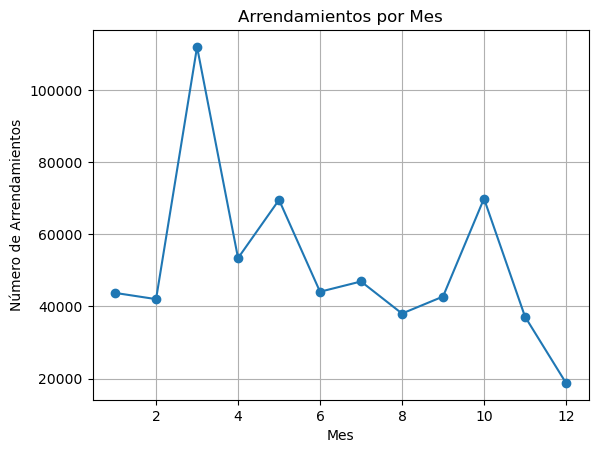

In [130]:
# Agrupar por mes y contar los arrendamientos
arrendamientos_por_mes = dataframe_bikes.groupby('month').size()

# Graficar los arrendamientos por mes
plt.plot(arrendamientos_por_mes.index, arrendamientos_por_mes.values, marker='o')
plt.title('Arrendamientos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Arrendamientos')
plt.grid(True)
plt.show()


In [139]:

arrendamientos_por_mes_año = dataframe_bikes.groupby(['year', 'month']).size()

arrendamientos_por_mes_año

year    month
2013.0  12.0      1457
2014.0  1.0       3375
        2.0       5506
        3.0      25792
        4.0      14461
        5.0      15047
        6.0      13650
        7.0      14346
        8.0      11128
        9.0      11563
        10.0     22795
        11.0     10767
        12.0      7273
2015.0  1.0       7765
        2.0       9572
        3.0      30112
        4.0      16554
        5.0      15842
        6.0      13894
        7.0      16332
        8.0      14523
        9.0      15244
        10.0     22864
        11.0     11762
        12.0     10057
2016.0  1.0      22161
        2.0      13355
        3.0      29566
        5.0      19560
        6.0      16540
        7.0      16255
        8.0      12385
        9.0      15939
        10.0     24266
        11.0     14653
2017.0  1.0      10460
        2.0      13599
        3.0      26532
        4.0      22404
        5.0      19123
dtype: int64

In [140]:
arrendamientos_por_mes_año = arrendamientos_por_mes_año.reset_index(name='count')
arrendamientos_por_mes_año

,year,month,count
0,2013.0,12.0,1457
1,2014.0,1.0,3375
2,2014.0,2.0,5506
3,2014.0,3.0,25792
4,2014.0,4.0,14461
5,2014.0,5.0,15047
6,2014.0,6.0,13650
7,2014.0,7.0,14346
8,2014.0,8.0,11128
9,2014.0,9.0,11563


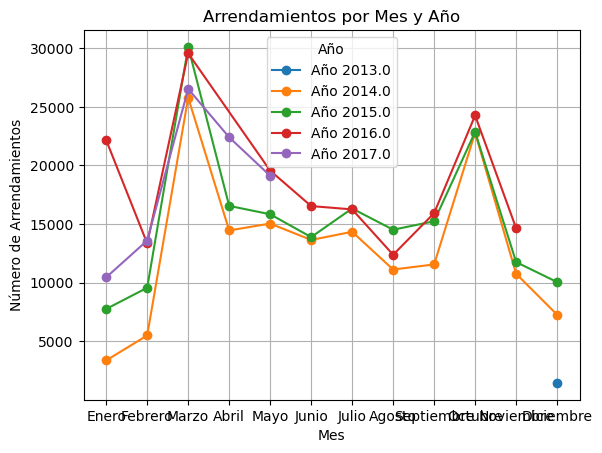

In [141]:
for year in arrendamientos_por_mes_año['year'].unique():
    data = arrendamientos_por_mes_año[arrendamientos_por_mes_año['year'] == year]
    plt.plot(data['month'], data['count'], marker='o', label=f'Año {year}')

plt.title('Arrendamientos por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Número de Arrendamientos')
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.legend(title='Año')
plt.grid(True)
plt.show()